In [1]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
!ls

 bench				  tensorflow
 bench_no_split.csv		  tf_nightly-2.5.0-cp36-cp36m-linux_x86_64.whl
 bench_with_split.csv		  xla_dist_rewrite.py
 drafts				  xla_dot_reorder_playground.py
'Gambit optimizations.pdf'	  xla-dump
 Plots.ipynb			  xla_mat_inv.py
 README.md			  xla_playground.py
 requirements.txt		  xla_speed_test.py
 student-project-description.md   xla_while_test.py


In [16]:
def rows(file):
    csv = open(f"{file}.csv", "r").read()
    rows = [row.split("\t") for row in csv.split("\n")]
    
    sizes = [float(row[1]) for row in rows]
    times = [float(row[2]) for row in rows]
    memes = [float(row[3]) for row in rows]
    return (rows, sizes, times, memes)

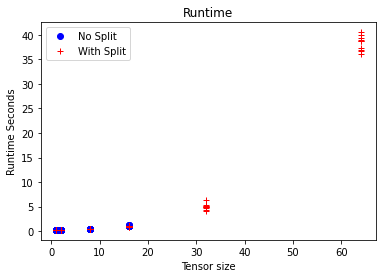

In [29]:
# plot times
_, s_ns, t_ns, _ = rows("bench_no_split")
_, s_ws, t_ws, _ = rows("bench_with_split")
plt.plot(s_ns, t_ns, "ob", label="No Split")
plt.plot(s_ws, t_ws, "+r", label="With Split")
plt.title("Runtime")
plt.ylabel("Runtime Seconds")
plt.xlabel("Tensor size")
plt.legend()
plt.show()

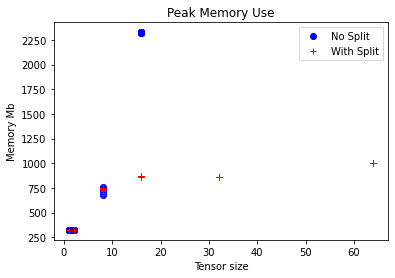

In [28]:
# plot memory
_, s_ns, _, m_ns = rows("bench_no_split")
_, s_ws, _, m_ws = rows("bench_with_split")
plt.plot(s_ns, m_ns, "ob", label="No Split")
plt.plot(s_ws, m_ws, "+r", label="With Split")
plt.title("Peak Memory Use")
plt.ylabel("Memory Mb")
plt.xlabel("Tensor size")
plt.legend()
plt.show()